# B0 map calculation tutorial

Start by importing the required libraries and defining some settings:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from ukat.data import fetch
from ukat.mapping.b0 import B0

# Ensure figures are rendered in the notebook
%matplotlib inline

Tell python where to store the B0 map NIfTI file we will generate. We will store it in a directory called `b0_calculation_output` in the `tutorials` directory.

In [2]:
# Initialise output path for B0 maps
directory = 'b0_calculation_output'
os.makedirs(directory, exist_ok=True)
OUTPUT_DIR = os.path.join(os.getcwd(), directory)

Retrieve B0 test data using our data fetcher. The first time the fetcher is run, it will download the data from the
internet, after that it will just use the cached local data.

This will return 4 variables:
* `magnitude`: a 4D array with the magnitude data at all echo times.
* `phase`: a 4D array with the phase data at all echo times.
* `affine`: the affine matrix for the data (needed to later write a new NIfTI file).
* `te`: an array containing the echo times, in seconds.

In [3]:
# Fetch test data
magnitude, phase, affine, te = fetch.b0_philips()
te = te * 1000  # convert TEs to ms

Compute the B0 map using the `B0` class implemented in `mapping`:

In [4]:
# Initialise B0 mapping object
mapper = B0(phase, te, affine=affine, unwrap=True)

first_echo = mapper.phase0
second_echo = mapper.phase1
difference_echos = mapper.phase_difference
b0map = mapper.b0_map

# Save output maps to Nifti
mapper.to_nifti(output_directory=OUTPUT_DIR, base_file_name='Philips2')

Display a central slice of the images. Note the units are rads and Hz for the B0Map.

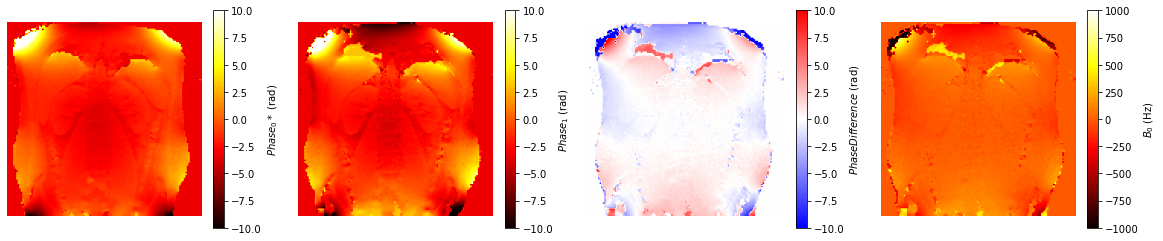

In [5]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 4))

# Display a central slice of Phase Echo 1
im = ax1.imshow(np.rot90(first_echo[:, :, 4]), cmap='hot', clim=(-10, 10))
cb = fig.colorbar(im, ax=ax1)
cb.set_label('$Phase_0*$ (rad)')
ax1.axis('off')

# Display a central slice of Phase Echo 2
im = ax2.imshow(np.rot90(second_echo[:, :, 4]), cmap='hot', clim=(-10, 10))
cb = fig.colorbar(im, ax=ax2)
cb.set_label('$Phase_1$ (rad)')
ax2.axis('off')

# Display the difference between the two Phase Echoes
im = ax3.imshow(np.rot90(difference_echos[:, :, 4]), cmap='bwr', clim=(-10, 10))
cb = fig.colorbar(im, ax=ax3)
cb.set_label('$Phase Difference$ (rad)')
ax3.axis('off')

# Display the resulting B0 Map
im = ax4.imshow(np.rot90(b0map[:, :, 4]), cmap='hot', clim=(-1000, 1000))
cb = fig.colorbar(im, ax=ax4)
cb.set_label('$B_0$ (Hz)')
ax4.axis('off')

plt.show()